# 교육일지
---
## 교육내용
* 결정트리,교차검증,랜덤포레스트,클러스터

## 교육일시
* 2021년 10월 20일

## 교육장소
* YGL-C6
---  

## DecisionTree
* 스무고개처럼 질문을 하나씩 던져 정답을 맞춰가는 것과 같다

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wine = pd.read_csv('https://bit.ly/wine-date')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
features = wine[['alcohol', 'sugar', 'pH']].to_numpy()
targets = wine['class'].to_numpy()

In [6]:
features[:5]

array([[9.4 , 1.9 , 3.51],
       [9.8 , 2.6 , 3.2 ],
       [9.8 , 2.3 , 3.26],
       [9.8 , 1.9 , 3.16],
       [9.4 , 1.9 , 3.51]])

In [7]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
     features,
     targets,
      stratify=targets, 
      random_state=42)
      

In [8]:
print(train_input.shape)
print(test_input.shape)

(4872, 3)
(1625, 3)


In [9]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_input, train_target)

DecisionTreeClassifier()

In [10]:
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.9977422003284072
0.8732307692307693


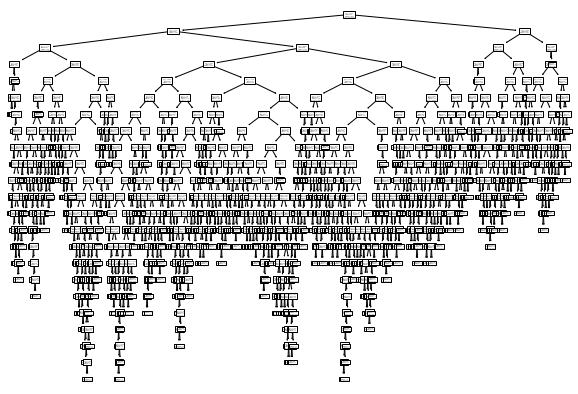

In [11]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

### Node란?
* 트리를 구성하는 핵심요소로써 데이터 특성에 대한 테스트를 표현
* Branch는 테스트의 결과를 나타낸다.
* 일반적으로 하나의 노드는 2개의 가지를 가진다.

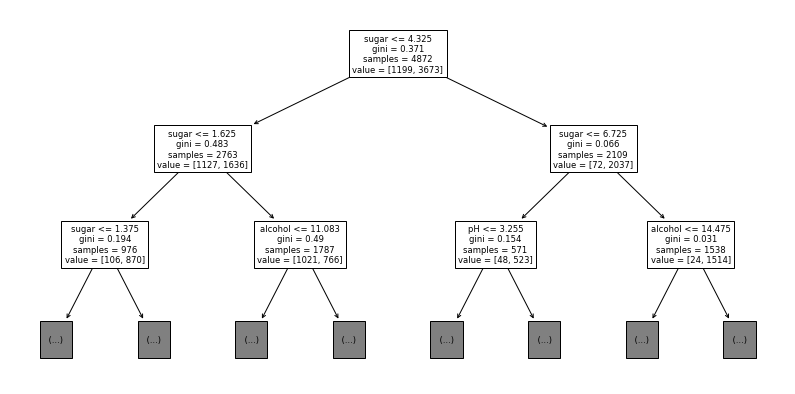

In [12]:
plt.figure(figsize=(14, 7))
plot_tree(dt, max_depth=2, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [13]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [14]:
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8472906403940886
0.8375384615384616


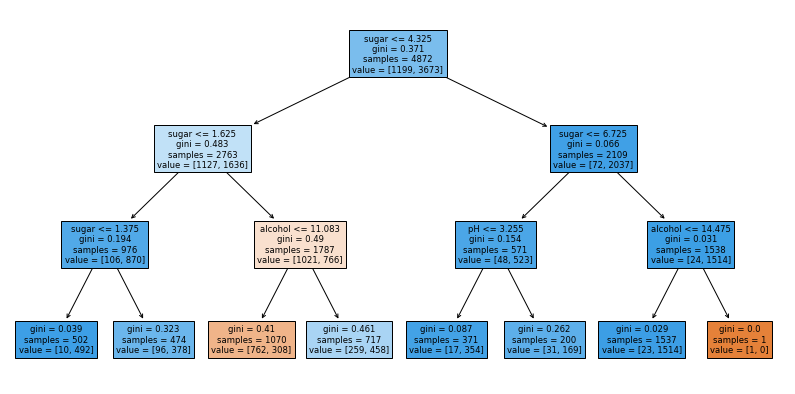

In [15]:
plt.figure(figsize=(14, 7))
plot_tree(dt, feature_names=['alcohol', 'sugar', 'pH'], filled=True)
plt.show()

In [16]:
dt.feature_importances_

array([0.14641491, 0.84937269, 0.0042124 ])

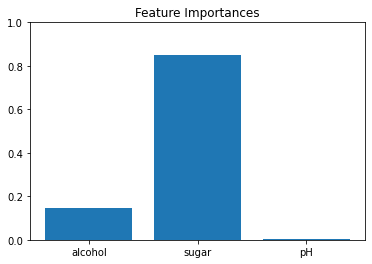

In [17]:
importances = dt.feature_importances_
indices = np.arange(0, len(importances))
plt.bar(indices, importances)
plt.xticks(indices, ['alcohol', 'sugar', 'pH'])
plt.title('Feature Importances')
plt.ylim((0, 1))
plt.show()

# validation

* 검증세트를 통해 모델이 과대 적합인지 과소적합인지 판단한다. 
* 훈련세트의 20%를 떼어내어 검증세트로 만든다

# Cross Validation
* 교차 검증은 검증세트를 떼어내어 평가하는 과정을 여러번 반복
* 이후 점수를 평균하여 최종 검증 점수를 획득

In [18]:

wine = pd.read_csv('https://bit.ly/wine-date')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [20]:
features = wine[['alcohol', 'sugar', 'pH']].to_numpy()
targets = wine['class'].to_numpy()

In [21]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(features, targets, stratify=targets, random_state=42)

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

In [23]:
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, train_X, train_y, cv=10) # k-fold, k=10

In [24]:
scores

{'fit_time': array([0.01689386, 0.01497936, 0.01495886, 0.0169549 , 0.01396632,
        0.01495576, 0.01987243, 0.01595712, 0.01681709, 0.01698709]),
 'score_time': array([0.00100207, 0.00097322, 0.00161767, 0.0019958 , 0.00099754,
        0.00107455, 0.00199127, 0.00199437, 0.00199533, 0.00196171]),
 'test_score': array([0.86885246, 0.86065574, 0.86036961, 0.85626283, 0.86447639,
        0.85420945, 0.86652977, 0.84188912, 0.8788501 , 0.86036961])}

In [25]:
scores['test_score'].mean()

0.8612465075571414

In [26]:
from sklearn.model_selection import StratifiedKFold

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=True)
dt = DecisionTreeClassifier(random_state=42)
scores = cross_validate(dt, train_X, train_y, cv=splitter)

In [27]:
scores

{'fit_time': array([0.0299263 , 0.0319159 , 0.03192019, 0.03178668, 0.04089332,
        0.0249145 , 0.02193856, 0.02493548, 0.02596545, 0.02000618]),
 'score_time': array([0.00203466, 0.00299287, 0.0029912 , 0.00399017, 0.00312757,
        0.00102925, 0.00199771, 0.00211   , 0.00096369, 0.00093603]),
 'test_score': array([0.85245902, 0.86680328, 0.862423  , 0.86858316, 0.85420945,
        0.85420945, 0.86447639, 0.84804928, 0.87063655, 0.83983573])}

In [28]:
scores['test_score'].mean()

0.8581685293028579

## Grid Search (Hyperparameter Tuning)
* 하이퍼 파라미터의 값에 따라 모델의 결과가 달라진다. 
* 많은 양의 하이퍼파라미터를 튜닝할 수 있게 GridsearchCV 클래스를 사용한다. 

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
dt = DecisionTreeClassifier(max_depth=3)

# 튜닝할 하이퍼 파라미터 값들을 리스트 딕셔너리로 만듬
params = {
    'max_depth': np.arange(2, 100 ,1),
    'min_impurity_decrease': np.arange(0.0001, 0.001, 0.001)
}
gs = GridSearchCV(dt, param_grid=params, cv=10, n_jobs=-1)
gs.fit(train_X, train_y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=3), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'min_impurity_decrease': array([0.0001])})

In [34]:
print(gs.best_params_)
print(gs.score(train_X, train_y))
print(gs.score(test_X, test_y))

{'max_depth': 25, 'min_impurity_decrease': 0.0001}
0.9663382594417077
0.8775384615384615


In [35]:
gs.cv_results_['mean_test_score'].mean()

0.8681577574309085

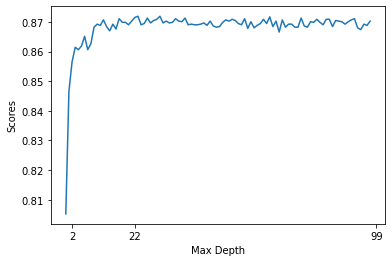

In [36]:
plt.plot(gs.cv_results_['mean_test_score'])
plt.xlabel('Max Depth')
plt.ylabel('Scores')

ticks = params['max_depth']
ticks = [ticks.min(), gs.best_estimator_.get_depth(), ticks.max()]
plt.xticks(ticks)
plt.show()

In [37]:
dt = gs.best_estimator_
print(dt.score(train_X, train_y))
print(dt.score(test_X, test_y))

0.9663382594417077
0.8775384615384615


# RandomForest

* 결정트리의 앙상블 모델

In [39]:
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine_csv_data')

feature_names = ['alcohol', 'sugar', 'pH']
features = wine[feature_names].to_numpy()
targets = wine['class'].to_numpy()

train_X, test_X, train_y, test_y = train_test_split(features, targets, stratify=targets, random_state=42)

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, criterion='gini', n_jobs=-1)

scores = cross_validate(rf, train_X, train_y, cv=10, return_train_score=True)

In [41]:
scores

{'fit_time': array([0.32648921, 0.19848943, 0.18618107, 0.19547772, 0.36448646,
        0.22339106, 0.38197613, 0.40418506, 0.3701582 , 0.41292477]),
 'score_time': array([0.03091764, 0.0328958 , 0.16911101, 0.03091455, 0.03734779,
        0.04661894, 0.03590417, 0.06334376, 0.0518651 , 0.07292366]),
 'test_score': array([0.89139344, 0.88319672, 0.89117043, 0.88090349, 0.90143737,
        0.88706366, 0.8973306 , 0.89117043, 0.90143737, 0.89322382]),
 'train_score': array([0.99817518, 0.99794708, 0.99794755, 0.9977195 , 0.99794755,
        0.9977195 , 0.9981756 , 0.9977195 , 0.99794755, 0.9981756 ])}

In [43]:
print(scores['train_score'].mean())
print(scores['test_score'].mean())

0.9979474600287975
0.8918327330258862


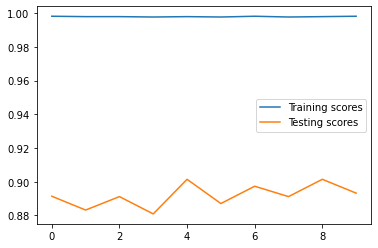

In [44]:
plt.plot(scores['train_score'], label='Training scores')
plt.plot(scores['test_score'], label='Testing scores')
plt.legend()
plt.show()

In [45]:
rf = RandomForestClassifier(n_estimators=100, criterion='gini', n_jobs=-1)

rf.fit(train_X, train_y)
rf.feature_importances_

array([0.24282359, 0.49290354, 0.26427287])

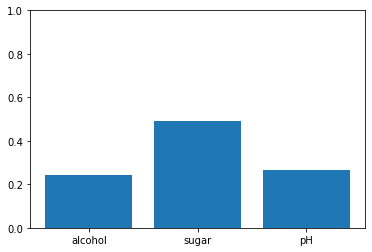

In [46]:
feature_name_indices = np.arange(0, len(feature_names))
plt.bar(feature_name_indices, rf.feature_importances_)
plt.xticks(feature_name_indices, feature_names)
plt.ylim((0, 1))
plt.show()

## K_mean Clustering
* Target을 모르는 비지도 학습
* 

In [48]:
!pip install wget
!python -m wget https://bit.ly/fruits_300 -o fruits_300.npy

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9679 sha256=2b91a52103ca0da805e0ea4afcf0e9798d4915990abdff720eb167c1f7b2f9cb
  Stored in directory: c:\users\ir749\appdata\local\pip\cache\wheels\bd\a8\c3\3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget

Saved under fruits_300.npy


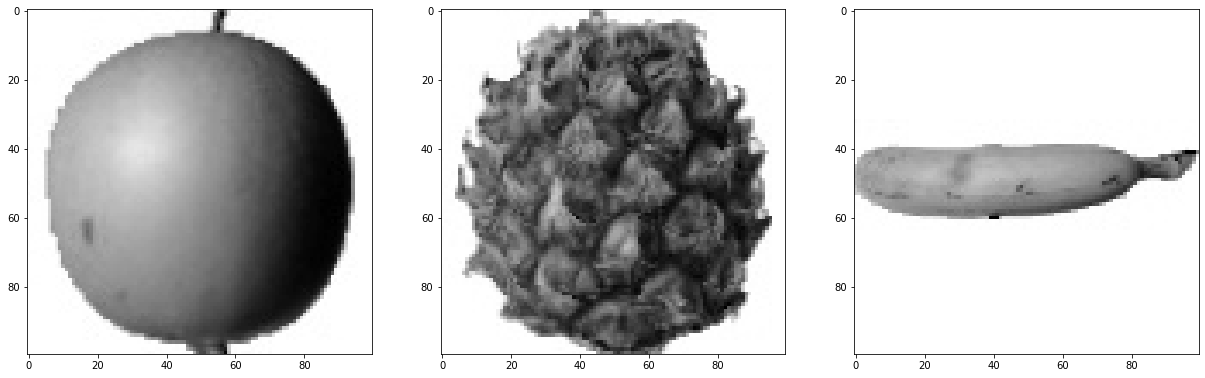

In [49]:
fruits = np.load('fruits_300.npy')

fig = plt.figure(figsize=(21, 7))
def plot_images(fig, images):
  for i in range(len(images)):
    ax = fig.add_subplot(1, len(images), i + 1)
    ax.imshow(images[i], cmap='gray_r')
  plt.show()

plot_images(fig, [fruits[0], fruits[100], fruits[200]])

In [50]:
fruits.shape

(300, 100, 100)

In [51]:
fruits_2d = fruits.reshape(-1, 100 * 100)  # 데이터 flatten

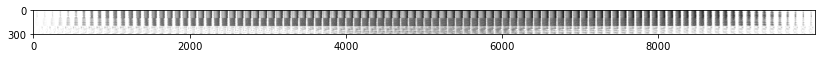

In [52]:
plt.figure(figsize=(14, 10))
plt.imshow(fruits_2d, cmap='gray_r')
plt.yticks([0, 300])
plt.show()

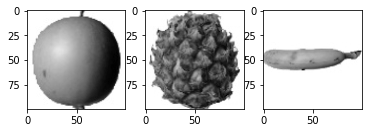

In [53]:
fig, axes = plt.subplots(1, 3)

axes[0].imshow(fruits[0], cmap='gray_r')
axes[1].imshow(fruits[100], cmap='gray_r')
axes[2].imshow(fruits[200], cmap='gray_r')

plt.show()

In [55]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters =3, random_state = 42)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [56]:
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [57]:
km.cluster_centers_.shape

(3, 10000)

In [58]:
km_center = km.cluster_centers_.reshape(-1, 100, 100)
km_center.shape

(3, 100, 100)

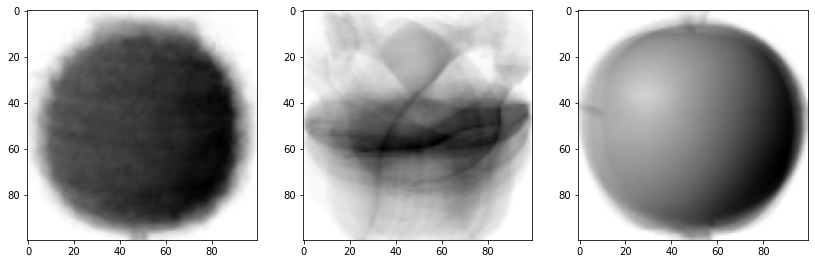

In [59]:
fig = plt.figure(figsize=(14, 7))
plot_images(fig, [*km_center])

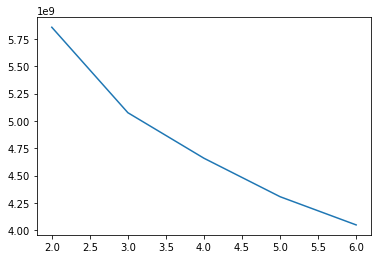

In [60]:
inertia = []

for k in range(2, 7):
  km = KMeans(n_clusters=k)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.show()

In [61]:
km.predict(fruits_2d[100:101]) 

array([2])

In [62]:
km.cluster_centers_

array([[1.01098901, 1.01098901, 1.01098901, ..., 1.        , 1.        ,
        1.        ],
       [1.19607843, 1.1372549 , 1.19607843, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])